In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe


In [2]:
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility, PortfolioVaR
import pandas as pd
# imp.reload(Admin)

In [3]:
universe.get_security('GAPSX').price

Unnamed: 0
2000-01-01          NaN
2000-01-02          NaN
2000-01-03     8.299891
2000-01-04     8.095037
2000-01-05     8.009132
2000-01-06     7.962875
2000-01-07     8.134686
2000-01-08     8.134686
2000-01-09     8.134686
2000-01-10     8.233809
2000-01-11     8.174335
2000-01-12     8.134686
2000-01-13     8.227203
2000-01-14     8.299891
2000-01-15     8.299891
2000-01-16     8.299891
2000-01-17     8.299891
2000-01-18     8.280067
2000-01-19     8.253634
2000-01-20     8.233809
2000-01-21     8.200769
2000-01-22     8.200769
2000-01-23     8.200769
2000-01-24     8.075214
2000-01-25     8.035563
2000-01-26     8.048779
2000-01-27     8.068607
2000-01-28     7.923225
2000-01-29     7.923225
2000-01-30     7.923225
                ...    
2019-05-03    18.740000
2019-05-04    18.740000
2019-05-05    18.740000
2019-05-06    18.590000
2019-05-07    18.270000
2019-05-08    18.250000
2019-05-09    18.150000
2019-05-10    18.240000
2019-05-11    18.240000
2019-05-12    18.240000
2019-

We are in a good state, target weights with short selling returned


([(0.103, 0.065)],
 [{'MRD.TO': 0.07739194719224772,
   'CIM.AX': -0.06368499394986335,
   'GAPSX': 0.19402534951358721,
   'LNC': -0.0549598576098025,
   'KNEBV.HE': 0.06264121355892392,
   'HBD.TO': 0.09742295556192719,
   'HGU.TO': 0.054482565519328625,
   'OIH': -0.07231142008944524,
   'RIT.TO': 0.3599419245398914,
   'EMB': 0.3450503157632052}])

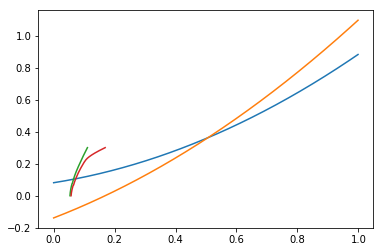

In [4]:
#Initialize admin
test_admin=Admin()
#
test_admin.suggestPortfolio('3','2014-04-01')

In [5]:
test_admin.acceptPortfolio(0)
test_admin.getAccountValue('2014-04-01')

195745.59451923805

In [6]:
test_admin.trackPortfolio(rebalance_flag=True,rebalance_freq='3MS',rebal_start_date='2014-09-01')

In [7]:
test_admin.portfolio

{'2014-04-01': <Portfolio.Portfolio at 0x20028877ba8>,
 '2014-09-01': <Portfolio.Portfolio at 0x20026abeba8>,
 '2014-12-01': <Portfolio.Portfolio at 0x20028b79ba8>,
 '2015-03-01': <Portfolio.Portfolio at 0x20028877e10>,
 '2015-06-01': <Portfolio.Portfolio at 0x20028b963c8>,
 '2015-09-01': <Portfolio.Portfolio at 0x20028b79470>,
 '2015-12-01': <Portfolio.Portfolio at 0x20028b8e320>,
 '2016-03-01': <Portfolio.Portfolio at 0x20028b8eac8>,
 '2016-06-01': <Portfolio.Portfolio at 0x2002977a2e8>,
 '2016-09-01': <Portfolio.Portfolio at 0x2002977a908>,
 '2016-12-01': <Portfolio.Portfolio at 0x2002977a978>,
 '2017-03-01': <Portfolio.Portfolio at 0x20028b8efd0>,
 '2017-06-01': <Portfolio.Portfolio at 0x20028c337f0>,
 '2017-09-01': <Portfolio.Portfolio at 0x20028c33518>,
 '2017-12-01': <Portfolio.Portfolio at 0x20028c330b8>,
 '2018-03-01': <Portfolio.Portfolio at 0x2002977ae10>,
 '2018-06-01': <Portfolio.Portfolio at 0x20028c43f28>,
 '2018-09-01': <Portfolio.Portfolio at 0x20028c43dd8>,
 '2018-12-

In [8]:
start_date='2014-04-01'
test_admin.getAccountValue(start_date)

195745.59451923805

We are in a good state, target weights with short selling returned


195745.59451923805

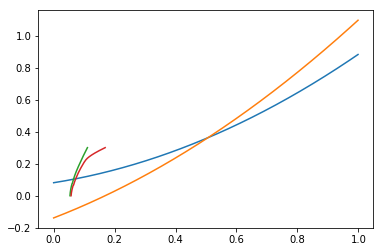

In [9]:
test_admin_norebal=Admin()
#
test_admin_norebal.suggestPortfolio('3',start_date)
test_admin_norebal.acceptPortfolio(0)
test_admin_norebal.trackPortfolio(rebalance_flag=False)
test_admin_norebal.getAccountValue(start_date)

In [10]:
from datetime import datetime
date_format='%Y-%m-%d'
today_date=test_admin.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
portf_values=[]
portf_values_norebal=[]
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))
    portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    

In [11]:
# portf_values=[]
# portf_values_norebal=[]
# for item in all_dates:
#     portf_values.append(test_admin.getAccountValue(item))
#     portf_values_norebal.append(test_admin_norebal.getAccountValue(item))
    

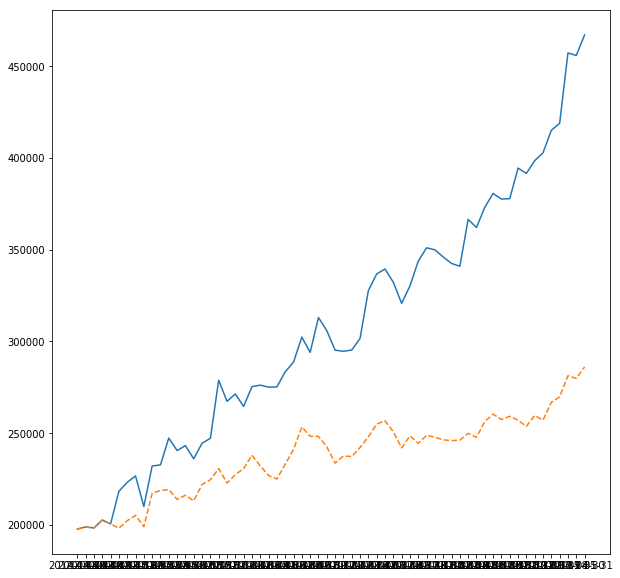

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
plt.plot(all_dates,portf_values_norebal,'--')

In [12]:
import numpy as np
portfolio1_values=pd.DataFrame([np.float(item) for item in portf_values],index=all_dates,columns=['Rebal'])
portfolio1_values['NoRebal']=[np.float(item) for item in portf_values_norebal]

In [13]:
portfolio1_values.to_csv('/Users/jkhai/RoboAdvisor/Reports/portfolio3_values.csv')

In [19]:
start_date='2019-03-01'
# start_date='2014-04-01'
print(MeanReturn(test_admin.portfolio,start_date,today_date))
print(SimpleReturn(test_admin.portfolio,start_date,today_date))
print(TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
print(MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
print(Volatility(test_admin.portfolio,start_date,today_date))

0.1256022337378606
92
0.281663258828291
0.07383900278223532
0.5423948720690186
0.04690567869206162


In [17]:
from Admin import ReturnAttribCurrency

In [15]:
betas, VaRannual=PortfolioVaR(test_admin,start_date,today_date,True)
VaRannual

30806.048385868726

In [18]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01','2019-06-01')

(Currency
 AUD    0.000067
 CAD    0.000000
 EUR    0.000345
 USD    0.011280
 Name: Return Contribution, dtype: float64,
 0.052256461236900975,
 0.06467629450515384)

In [17]:
# def MarginalVaRs(account,fit_start_date,fit_end_date):
#     #Think about currency
#     #fit model in local currency, aggregate to potfolio level in CAD
#     #when to do conversion for risk metrics???
    
#     from HelperFunctions import fill_missing_data_business
#     result_df = pd.DataFrame()
#     factor_tickers = universe._riskFactors.keys()
#     #print(factor_tickers)
#     for k in factor_tickers:
#         result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, fit_start_date, fit_end_date,freq='B')
#     factor_cov=result_df.cov()*252
    
#     for item in account.PortfolioWeights.keys():
#         model1[item]=universe.fitFactorModel(item,fit_start_date,252*5).params
#     betas=pd.DataFrame(index=list(model1.keys()),columns=factor_cov.index)
#     for item in model1.keys():
#         betas.loc[item,:]=model1[item].reindex(factor_cov.index,fill_value=0)
        
#     sec_cov=pd.DataFrame(np.dot(betas,np.dot(factor_cov,betas.transpose())),index=list(model1.keys()),columns=list(model1.keys()))
#     weights=[np.float(item) for item in list(account.PortfolioWeights.values())]
#     portf_vol=np.sqrt(np.dot(weights,np.dot(sec_cov,weights)))
    
    
#     result_df['Portfolio']=np.array(np.dot(np.dot(result_df,betas.transpose()),weights)).astype(np.float64)
#     result_df_cov=252*result_df.cov()
#     betas_new=result_df_cov.loc[:,'Portfolio'].divide(portf_vol**2)    
#     MVaRs=betas_new*sp.stats.norm.ppf(0.95)*portf_vol
#     #now to dollar value
# #     for item in account.PortfolioWeights.keys():
        
#     return MVaRs

In [18]:
from Admin import MarginalVaRs
Mar_vars=MarginalVaRs(test_admin,start_date,today_date)

In [19]:
Mar_vars

Mkt-RF_log             0.208962
SMB_log                0.000767
HML_log               -0.042988
RMW_log               -0.005584
CMA_log               -0.028926
Mkt-RF_log_global      0.119361
SMB_log_global        -0.037384
HML_log_global        -0.027309
RMW_log_global         0.001781
CMA_log_global        -0.019520
CADUSD=X               0.033319
AUDUSD=X               0.043578
Mkt-RF_log_EUR         0.098621
SMB_log_EUR           -0.032286
HML_log_EUR           -0.006574
RMW_log_EUR            0.006368
CMA_log_EUR           -0.009363
EURUSD=X              -0.008314
Mkt-RF_log_JPY         0.012363
SMB_log_JPY           -0.003562
HML_log_JPY           -0.012652
RMW_log_JPY            0.001895
CMA_log_JPY           -0.008322
JPYUSD=X              -0.039287
SP500                  0.205729
US Large Cap           0.206462
US Small Cap           0.204871
US Mid Cap             0.206279
TSX                    0.117443
Europe                 0.199749
EM                     0.096774
US Treas

In [20]:
from HelperFunctions import fill_missing_data_business
factor_tickers = universe._riskFactors.keys()
    #print(factor_tickers)
result_df = pd.DataFrame()
for k in factor_tickers:
    result_df[k] = fill_missing_data_business(universe._riskFactors[k].price, start_date, today_date,'BM')

In [21]:
result_df['Portfolio']=np.dot(np.dot(result_df,betas.transpose()),weights).astype(numpy.float64)

NameError: name 'np' is not defined

In [ ]:
new_df=result_df.copy()


In [ ]:
type(new_df['VIX'][0])

In [ ]:
#decomposing security return
def ReturnAttribCurrency(PortfolioWeights,d1,d2):
    df_tmp=pd.DataFrame(index=list(PortfolioWeights.keys()),columns=['Weights','Currency','LocalReturn','CADReturn','FX_appr'])
    for sec_name in PortfolioWeights.keys():
        local_ret=universe.get_security(sec_name).price.loc[today_date]/universe.get_security(sec_name).price.loc['2019-03-01']-1
        report_ret=universe.get_price_in_currency(sec_name,today_date,'CAD')/universe.get_price_in_currency(sec_name,'2019-03-01','CAD')-1
        FX_app=(report_ret-local_ret)/(local_ret+1)

        df_tmp.loc[sec_name,:]=[PortfolioWeights[sec_name],
                                universe.get_security(sec_name).currency,
                                local_ret,
                                report_ret,
                                FX_app]
    df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
    df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
    df_tmp['CurContrWeighted']=df_tmp['FX_appr'].multiply(df_tmp['Weights'])

    cur_contrib=df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()
    local_cur_return=cur_contrib.sum()['LocalReturnWeighted']
    report_cur_return=cur_contrib.sum()['CADReturnWeighted']
    cur_contrib.rename(columns={'CurContrWeighted':'Return Contribution'},inplace=True)
    return cur_contrib['Return Contribution'], local_cur_return, report_cur_return

In [ ]:
ReturnAttribCurrency(test_admin.PortfolioWeights,'2019-03-01',today_date)

In [ ]:
# df_tmp_weighted=
df_tmp['LocalReturnWeighted']=df_tmp['LocalReturn'].multiply(df_tmp['Weights'])
df_tmp['CADReturnWeighted']=df_tmp['CADReturn'].multiply(df_tmp['Weights'])
df_tmp['CurContrWeighted']=df_tmp['CurContr'].multiply(df_tmp['Weights'])
# .multiply(df_tmp['Weights'])

In [ ]:
df_tmp[['Currency','LocalReturnWeighted','CADReturnWeighted','CurContrWeighted']].groupby('Currency').sum()

In [ ]:
SimpleReturn(test_admin.portfolio,'2019-03-01',today_date,False)

In [ ]:
local_return

In [ ]:
np.dot(weights,local_return)

In [20]:
from Scenario import run_scenario
pnl_sec_asian_crisis,pnl_portf_asian_crisis=run_scenario(test_admin,0)
pnl_sec_financial_crisis,pnl_portf_financial_crisis=run_scenario(test_admin,1)


ValueError: Unable to coerce to Series, length must be 10: given 5

In [ ]:
pnl_sec_asian_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/2pnl_sec_asian_crisis.csv')
pnl_portf_asian_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/2pnl_portf_asian_crisis.csv')
pnl_sec_financial_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/2pnl_sec_financial_crisis.csv')
pnl_portf_financial_crisis.to_csv('/Users/jkhai/RoboAdvisor/Reports/2pnl_portf_financial_crisis.csv')